In this notebook, we aim to classify mushrooms as either edible or poisonous using machine learning. The dataset contains various mushroom characteristics, such as cap shape, gill color, and habitat. We preprocess the data through several key steps:

*Handling missing values.
*Encoding categorical features.
*Normalizing numerical columns.
*Detecting and addressing duplicates to ensure data integrity.

In [1]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBRegressor
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

load the datasets

In [2]:
# Load the dataset
df_1 = pd.read_csv(r"Mushrom_Xtrain.csv")
df_2 = pd.read_csv(r"Mushrom_y_train.csv")

In [3]:
df = pd.concat([df_1, df_2], axis=1)
df.head()
test=pd.read_csv("Mushrom_X_test.csv")
test.head()

,Unnamed: 0,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,10386,4.13,f,g,g,f,a,d,g,5.15,...,NaN,s,g,NaN,NaN,f,f,NaN,d,a
1,13007,0.72,x,g,o,f,NaN,NaN,y,3.86,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
2,30547,8.03,s,t,p,t,d,c,o,5.27,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3,55682,9.67,f,NaN,l,f,d,c,w,2.64,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
4,13481,1.43,x,g,n,f,d,d,n,2.53,...,NaN,s,n,NaN,NaN,f,f,NaN,d,a


In [4]:
# Get a summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45801 entries, 0 to 45800
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            45801 non-null  int64  
 1   cap-diameter          45801 non-null  float64
 2   cap-shape             45801 non-null  object 
 3   cap-surface           35242 non-null  object 
 4   cap-color             45801 non-null  object 
 5   does-bruise-or-bleed  45801 non-null  object 
 6   gill-attachment       38386 non-null  object 
 7   gill-spacing          27094 non-null  object 
 8   gill-color            45801 non-null  object 
 9   stem-height           45801 non-null  float64
 10  stem-width            45801 non-null  float64
 11  stem-root             7213 non-null   object 
 12  stem-surface          17211 non-null  object 
 13  stem-color            45801 non-null  object 
 14  veil-type             2389 non-null   object 
 15  veil-color         

In [5]:
# Summary statistics for numerical columns
print(df.describe())

         Unnamed: 0  cap-diameter   stem-height    stem-width    Unnamed: 0
count  45801.000000  45801.000000  45801.000000  45801.000000  45801.000000
mean   30510.889042      6.725566      6.578173     12.132931  30510.889042
std    17643.032905      5.222117      3.364258      9.986819  17643.032905
min        0.000000      0.380000      0.000000      0.000000      0.000000
25%    15216.000000      3.490000      4.650000      5.190000  15216.000000
50%    30517.000000      5.860000      5.960000     10.190000  30517.000000
75%    45833.000000      8.540000      7.730000     16.560000  45833.000000
max    61066.000000     62.340000     33.920000    103.910000  61066.000000


Check for the missing values

In [6]:
df.isnull().sum()

Unnamed: 0                  0
cap-diameter                0
cap-shape                   0
cap-surface             10559
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          7415
gill-spacing            18707
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               38588
stem-surface            28590
stem-color                  0
veil-type               43412
veil-color              40251
has-ring                    0
ring-type                1846
spore-print-color       40991
habitat                     0
season                      0
Unnamed: 0                  0
class                       0
dtype: int64

In [7]:
test.isnull().sum()

Unnamed: 0                  0
cap-diameter                0
cap-shape                   0
cap-surface              3561
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          2469
gill-spacing             6356
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               12950
stem-surface             9534
stem-color                  0
veil-type               14480
veil-color              13405
has-ring                    0
ring-type                 625
spore-print-color       13724
habitat                     0
season                      0
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season', 'Unnamed: 0', 'class'],
      dtype='object')

In [9]:
df.drop(
    columns=[
        "Unnamed: 0",
    ],
    inplace=True,
)

In [10]:
test.drop(
    columns=[
        "Unnamed: 0",
    ],
    inplace=True,
)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45801 entries, 0 to 45800
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          45801 non-null  float64
 1   cap-shape             45801 non-null  object 
 2   cap-surface           35242 non-null  object 
 3   cap-color             45801 non-null  object 
 4   does-bruise-or-bleed  45801 non-null  object 
 5   gill-attachment       38386 non-null  object 
 6   gill-spacing          27094 non-null  object 
 7   gill-color            45801 non-null  object 
 8   stem-height           45801 non-null  float64
 9   stem-width            45801 non-null  float64
 10  stem-root             7213 non-null   object 
 11  stem-surface          17211 non-null  object 
 12  stem-color            45801 non-null  object 
 13  veil-type             2389 non-null   object 
 14  veil-color            5550 non-null   object 
 15  has-ring           

In [12]:
df["gill-attachment"].value_counts()
test["gill-attachment"].value_counts()

gill-attachment
a    3219
d    2553
x    1875
p    1482
e    1406
s    1382
f     882
Name: count, dtype: int64

In [13]:
df["ring-type"].value_counts()
test["ring-type"].value_counts()

ring-type
f    12061
e      610
z      557
l      374
r      344
p      311
g      297
m       89
Name: count, dtype: int64

input missing values

In [14]:
mode_value_gill = df["gill-attachment"].mode()[0]
df["gill-attachment"].fillna(mode_value_gill, inplace=True)

mode_value_gill = test["gill-attachment"].mode()[0]
test["gill-attachment"].fillna(mode_value_gill, inplace=True)

In [15]:
mode_value_cap = df["cap-surface"].mode()[0]
df["cap-surface"].fillna(mode_value_cap, inplace=True)

mode_value_cap = test["cap-surface"].mode()[0]
test["cap-surface"].fillna(mode_value_cap, inplace=True)

In [16]:
mode_value_ring = df["ring-type"].mode()[0]
df["ring-type"].fillna(mode_value_ring, inplace=True)

mode_value_ring = test["ring-type"].mode()[0]
test["ring-type"].fillna(mode_value_ring, inplace=True)

In [17]:
df.isnull().sum()

cap-diameter                0
cap-shape                   0
cap-surface                 0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment             0
gill-spacing            18707
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               38588
stem-surface            28590
stem-color                  0
veil-type               43412
veil-color              40251
has-ring                    0
ring-type                   0
spore-print-color       40991
habitat                     0
season                      0
class                       0
dtype: int64

class
p    25416
e    20385
Name: count, dtype: int64


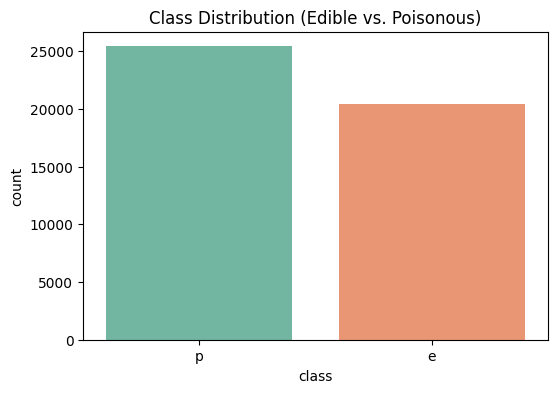

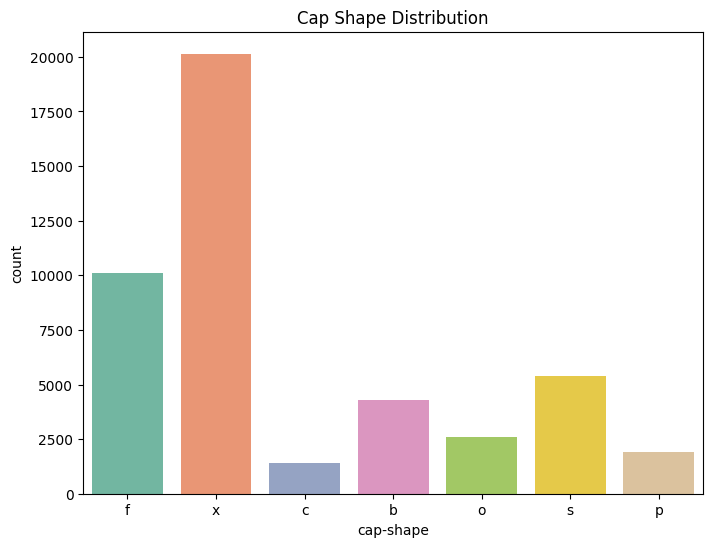

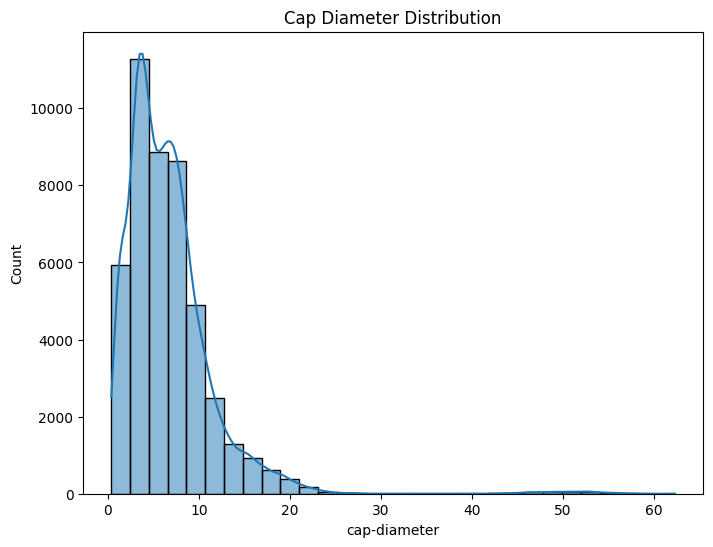

In [18]:
# Check the balance of the target variable 'class' (edible vs. poisonous)
class_counts = df["class"].value_counts()
print(class_counts)

# Plot the class balance
plt.figure(figsize=(6, 4))
sns.countplot(x="class", data=df, palette="Set2")
plt.title("Class Distribution (Edible vs. Poisonous)")
plt.show()

# Plot distribution of a nominal feature, e.g., cap-shape
plt.figure(figsize=(8, 6))
sns.countplot(x="cap-shape", data=df, palette="Set2")
plt.title("Cap Shape Distribution")
plt.show()

# Plot distribution of a numerical feature, e.g., cap-diameter
plt.figure(figsize=(8, 6))
sns.histplot(df["cap-diameter"], bins=30, kde=True)
plt.title("Cap Diameter Distribution")
plt.show()

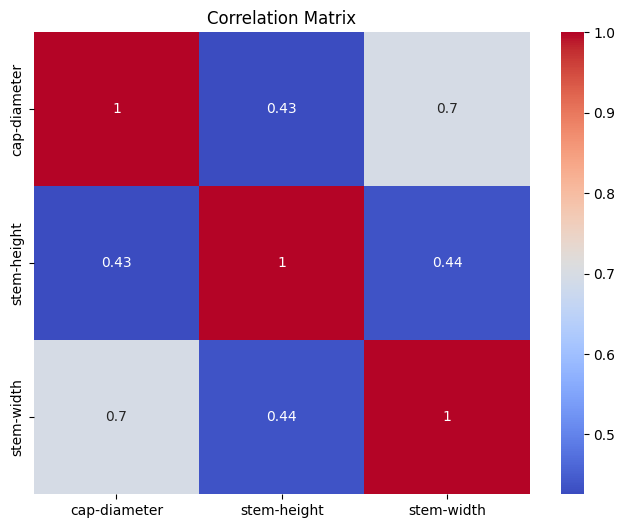

In [19]:
# Correlation matrix for numerical features
corr_matrix = df[["cap-diameter", "stem-height", "stem-width"]].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

encode categorical data

In [20]:
# Convert nominal (categorical) features to numerical values using One-Hot Encoding
df_encoded = pd.get_dummies(
    df,
    columns=[
        "cap-shape",
        "cap-surface",
        "cap-color",
        "gill-attachment",
        "gill-color",
        "stem-color",
        "ring-type",
        "habitat",
        "season",
    ],
)

# Display the first few rows of the encoded dataframe
print(df_encoded.head())

test_encoded = pd.get_dummies(
    test,
    columns=[
        "cap-shape",
        "cap-surface",
        "cap-color",
        "gill-attachment",
        "gill-color",
        "stem-color",
        "ring-type",
        "habitat",
        "season",
    ],
)

# Display the first few rows of the encoded dataframe
print(test_encoded.head())

   cap-diameter does-bruise-or-bleed gill-spacing  stem-height  stem-width  \
0          7.44                    f            d         5.35       16.80   
1          3.92                    f          NaN         5.76        3.55   
2          4.63                    f            f         2.76        8.48   
3          5.67                    f            c         6.29        7.44   
4          1.33                    f          NaN         4.44        1.48   

  stem-root stem-surface veil-type veil-color has-ring  ... habitat_h  \
0         b          NaN       NaN        NaN        f  ...     False   
1       NaN            y       NaN        NaN        t  ...      True   
2       NaN          NaN       NaN        NaN        f  ...     False   
3       NaN          NaN       NaN        NaN        f  ...     False   
4       NaN            s       NaN        NaN        f  ...     False   

  habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  season_a  season_s  \
0     False  

In [21]:
label_encoder = LabelEncoder()
for column in test.columns:
    test[column] = label_encoder.fit_transform(test[column])

label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

In [22]:
X = df.drop('class', axis=1)  # Features (drop the target column)
y = df['class']  # Target variable ('class')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

Training set shape: (32060, 20)
Test set shape: (13741, 20)


In [23]:
df.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
0,699,2,3,1,0,6,1,10,424,1626,...,8,11,1,6,0,1,7,0,2,1
1,347,6,10,11,0,0,3,10,465,301,...,7,12,1,6,1,6,7,2,0,1
2,418,6,9,11,0,3,2,2,165,794,...,8,12,1,6,0,1,7,0,0,0
3,522,1,4,11,0,0,0,8,518,690,...,8,11,1,6,0,1,7,0,2,1
4,88,0,8,5,0,0,3,3,333,94,...,5,6,1,6,0,1,7,0,0,1


In [24]:

logistic_classifier_model = LogisticRegression()
logistic_classifier_model.fit(X_train, y_train)
logistic_pred = logistic_classifier_model.predict(X_test)
logistic_report = classification_report(y_test, logistic_pred)

print("***** Logistic Regression *****")
print(logistic_report)

***** Logistic Regression *****
              precision    recall  f1-score   support

           0       0.56      0.46      0.51      6131
           1       0.62      0.71      0.66      7610

    accuracy                           0.60     13741
   macro avg       0.59      0.59      0.59     13741
weighted avg       0.60      0.60      0.59     13741



C:\Users\Moatsem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
decision_tree_model =DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
tree_pred = decision_tree_model.predict(X_test)
tree_report = classification_report(y_test, tree_pred)

print("***** Decision Tree *****")
print(tree_report)

***** Decision Tree *****
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6131
           1       1.00      1.00      1.00      7610

    accuracy                           1.00     13741
   macro avg       1.00      1.00      1.00     13741
weighted avg       1.00      1.00      1.00     13741



In [26]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
naive_bayes_pred = naive_bayes_model.predict(X_test)
naive_bayes_report = classification_report(y_test, naive_bayes_pred)

print("***** Naive Regression *****")
print(naive_bayes_report)

***** Naive Regression *****
              precision    recall  f1-score   support

           0       0.53      0.76      0.62      6131
           1       0.70      0.45      0.55      7610

    accuracy                           0.59     13741
   macro avg       0.61      0.61      0.59     13741
weighted avg       0.62      0.59      0.58     13741



In [27]:
random_forest_model = RandomForestClassifier(criterion="gini", random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_report = classification_report(y_test, random_forest_pred)

print("***** Random Forest *****")
print(random_forest_report)

***** Random Forest *****
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6131
           1       1.00      1.00      1.00      7610

    accuracy                           1.00     13741
   macro avg       1.00      1.00      1.00     13741
weighted avg       1.00      1.00      1.00     13741



In [28]:
knn_model = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_report = classification_report(y_test, knn_pred)

print("***** KNeighborsClassifier *****")
print(knn_report)

***** KNeighborsClassifier *****
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      6131
           1       0.83      0.83      0.83      7610

    accuracy                           0.81     13741
   macro avg       0.81      0.81      0.81     13741
weighted avg       0.81      0.81      0.81     13741



In [29]:

xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train, y_train)
xgboost_pred = xgboost_model.predict(X_test)
xgboost_report = classification_report(y_test, xgboost_pred)

print("***** XGboost Classifier *****")
print(xgboost_report)

***** XGboost Classifier *****
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6131
           1       1.00      1.00      1.00      7610

    accuracy                           1.00     13741
   macro avg       1.00      1.00      1.00     13741
weighted avg       1.00      1.00      1.00     13741



In [30]:
random_forest_pred = random_forest_model.predict(test)
submission_df = pd.DataFrame({
    'ID': test.index,
    'class': random_forest_pred
})

# Map the binary predictions to 'e' and 'p'
submission_df['class'] = np.where(submission_df['class'] == 1, 'p', 'e')

# Save the submission DataFrame to a CSV file
submission_df.to_csv('Submission.csv')
print("Submission file created: submission.csv")

Submission file created: submission.csv
